In [1493]:
import warnings
warnings.filterwarnings('ignore')

In [1494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fuzzywuzzy import fuzz, process

In [1495]:
data = pd.read_csv('all_bikez_curated (1) (1).csv')

In [1496]:
data.head()

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN
1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN


In [1497]:
data.shape

(38543, 17)

In [1498]:
data.isna().sum()

Brand                      0
Model                     28
Year                       0
Category                   0
Displacement (ccm)      1029
Power (hp)             12381
Engine cylinder           16
Engine stroke             11
Gearbox                 5810
Fuel capacity (lts)     6796
Fuel system            10650
Fuel control           16511
Cooling system          4221
Transmission type       5631
Dry weight (kg)        16009
Wheelbase (mm)         13013
Seat height (mm)       14318
dtype: int64

In [1499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38543 entries, 0 to 38542
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38543 non-null  object 
 1   Model                38515 non-null  object 
 2   Year                 38543 non-null  object 
 3   Category             38543 non-null  object 
 4   Displacement (ccm)   37514 non-null  float64
 5   Power (hp)           26162 non-null  float64
 6   Engine cylinder      38527 non-null  object 
 7   Engine stroke        38532 non-null  object 
 8   Gearbox              32733 non-null  object 
 9   Fuel capacity (lts)  31747 non-null  float64
 10  Fuel system          27893 non-null  object 
 11  Fuel control         22032 non-null  object 
 12  Cooling system       34322 non-null  object 
 13  Transmission type    32912 non-null  object 
 14  Dry weight (kg)      22534 non-null  float64
 15  Wheelbase (mm)       25530 non-null 

# Year

In [1500]:
data['Year'].unique()
# mixed type column

array(['2011', '2007', '2021', '2016', '2018', '2020', '2022', '1923',
       '1924', '1925', '1926', '1927', '2009', '2010', '2014', '2008',
       '2019', '2012', '2013', '2040', '1957', '1958', '1955', '1956',
       '1952', '1953', '1954', '1959', '1960', '2077', '2003', '3019',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1970', '1974', '1962 CE', '1963 CE',
       '2005', '2015', '2018 CE', '2006', '1922', '1928', '1949', '1950',
       '1951', '2001', '2017', '1986', '1999', '1985', '1987', '1996',
       '1991', '1988', '1989', '1990', '1992', '2004', '2002', '1997',
       '1998', '2000', '1993', '1984', '1995', '1948', '1937', '1938',
       '1931', '1901', '1902', '1903', '1913', '1914', '1915', '1916',
       '1918', '1932', '1933', '1934', '1935', '1936', '1939', '1940',
       '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1898',
       '1910', '1929', '1975', '1976', '1973', '1977', '1978', '1979',
     

In [1501]:
list_int = [1982, 1983, 1972, 1979, 1980, 1981, 1973, 2021, 2022, 1968, 1969,
       1991, 1992, 1995, 1996, 1997, 1998, 2013, 2014, 1999, 2000, 2001,
       2002, 2003, 1970, 2016, 2017, 2015, 2020, 1977, 2009, 2010, 2011,
       2019, 2008, 2012, 2007, 2006, 2018, 1994, 1974, 1975, 1993, 1987,
       1988, 1989, 1990, 1971, 1976, 1978, 2005, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1959, 1934,
       1935, 1936, 1937, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1964, 1965, 1966, 1967, 1960, 1961, 1962, 1963, 2004, 1897, 1913,
       1914, 1984, 1985, 1986, 1925, 1926, 1927, 1928, 1933, 1924, 1922,
       1923, 1921, 1929]
f2 = data['Year'].isin(list_int)
data['year_int'] = data.loc[f2,'Year']
data['year_int'].unique()
data['year_int'].fillna(0,inplace=True)

In [1502]:
strings = ['2011', '2007', '2021', '2016', '2018', '2020', '2022',
      '1923','1924', '1925', '1926', '1927', '2009', '2010', 
      '2014', '2008',  '2019', '2012', '2013', '2040', '1957',
      '1958', '1955', '1956', '1952', '1953', '1954', '1959', '1960', '2077', '2003', '3019',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1970', '1974', '1962 CE', '1963 CE',
       '2005', '2015', '2018 CE', '2006', '1922', '1928', '1949', '1950',
       '1951', '2001', '2017', '1986', '1999', '1985', '1987', '1996',
       '1991', '1988', '1989', '1990', '1992', '2004', '2002', '1997',
       '1998', '2000', '1993', '1984', '1995', '1948', '1937', '1938',
       '1931', '1901', '1902', '1903', '1913', '1914', '1915', '1916',
       '1918', '1932', '1933', '1934', '1935', '1936', '1939', '1940',
       '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1898',
       '1910', '1929', '1975', '1976', '1973', '1977', '1978', '1979',
       '1980', '1982', '1983', '1981', '1917', '1919', '1994', '1930',
       '1897', '1920', '1921', '1899', '1900', '1904', '1911', '1912',
       '1896', '1909', '1905', '1906', '1907', '1908', '1894', '1895']
f = data['Year'].isin(strings)
data['year_str'] = data.loc[f,'Year']
data['year_str'].unique()

array(['2011', '2007', '2021', '2016', '2018', '2020', '2022', '1923',
       '1924', '1925', '1926', '1927', '2009', '2010', '2014', '2008',
       '2019', '2012', '2013', '2040', '1957', '1958', '1955', '1956',
       '1952', '1953', '1954', '1959', '1960', '2077', '2003', '3019',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1970', '1974', '1962 CE', '1963 CE',
       '2005', '2015', '2018 CE', '2006', '1922', '1928', '1949', '1950',
       '1951', '2001', '2017', '1986', '1999', '1985', '1987', '1996',
       '1991', '1988', '1989', '1990', '1992', '2004', '2002', '1997',
       '1998', '2000', '1993', '1984', '1995', '1948', '1937', '1938',
       '1931', '1901', '1902', '1903', '1913', '1914', '1915', '1916',
       '1918', '1932', '1933', '1934', '1935', '1936', '1939', '1940',
       '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1898',
       '1910', '1929', '1975', '1976', '1973', '1977', '1978', '1979',
     

In [1503]:
data['year_str'] = data['year_str'].str.strip('CE')
data['year_str'].fillna('0',inplace=True)
data['year_str'] =data['year_str'].astype(int)
data['year_str'].unique()
data

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),year_int,year_str
0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN,0,2011
1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN,0,2007
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,0,2011
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,0,2021
4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38538,azel,aries 50,2009,Scooter,50.0,3.0,Single cylinder,four-stroke,Automatic,NaN,Carburettor,NaN,Air,Belt,84.0,1310.0,NaN,2009,0
38539,azel,aries 50,2010,Scooter,49.0,3.0,Single cylinder,four-stroke,Automatic,NaN,Carburettor,NaN,Air,Chain,92.0,1310.0,NaN,2010,0
38540,azel,atila 125,2009,Enduro / offroad,125.0,9.0,Single cylinder,four-stroke,Automatic,NaN,Carburettor,NaN,Air,Belt,120.0,1360.0,NaN,2009,0
38541,azel,atila 125,2010,Enduro / offroad,125.0,9.0,Single cylinder,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,120.0,1360.0,NaN,2010,0


In [1504]:
data['Prod_year'] = data['year_str'] + data['year_int']

In [1505]:
data.head()

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),year_int,year_str,Prod_year
0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN,0,2011,2011
1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN,0,2007,2007
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,0,2011,2011
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,0,2021,2021
4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN,0,2007,2007


In [1506]:
data.drop(['Year','year_str','year_int'],axis=1,inplace=True)

In [1507]:
data.head()

,Brand,Model,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Prod_year
0,acabion,da vinci 650-vi,Prototype / concept model,NaN,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN,2011
1,acabion,gtbo 55,Sport,1300.0,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN,2007
2,acabion,gtbo 600 daytona-vi,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,2011
3,acabion,gtbo 600 daytona-vi,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,2021
4,acabion,gtbo 70,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN,2007


In [1508]:
data['Prod_year'].unique()

array([2011, 2007, 2021, 2016, 2018, 2020, 2022, 1923, 1924, 1925, 1926,
       1927, 2009, 2010, 2014, 2008, 2019, 2012, 2013, 2040, 1957, 1958,
       1955, 1956, 1952, 1953, 1954, 1959, 1960, 2077, 2003, 3019, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1970,
       1974, 2005, 2015, 2006, 1922, 1928, 1949, 1950, 1951, 2001, 2017,
       1986, 1999, 1985, 1987, 1996, 1991, 1988, 1989, 1990, 1992, 2004,
       2002, 1997, 1998, 2000, 1993, 1984, 1995, 1948, 1937, 1938, 1931,
       1901, 1902, 1903, 1913, 1914, 1915, 1916, 1918, 1932, 1933, 1934,
       1935, 1936, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1898, 1910, 1929, 1975, 1976, 1973, 1977, 1978, 1979, 1980, 1982,
       1983, 1981, 1917, 1919, 1994, 1930, 1897, 1920, 1921, 1899, 1900,
       1904, 1911, 1912, 1896, 1909, 1905, 1906, 1907, 1908, 1894, 1895],
      dtype=int64)

In [1509]:
data['Prod_year'].isna().sum()

0

In [1510]:
# motorcycles were invented in 1885 , so time range [1885 , 2023]
f  = (data['Prod_year'] > 1885 ) & (data['Prod_year'] < 2023)
data['Prod_year'][~f]

58     2040
133    2077
170    3019
Name: Prod_year, dtype: int64

In [1511]:
data.loc[~f]

,Brand,Model,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Prod_year
58,adiva,n125,Scooter,124.0,10.3,Single cylinder,four-stroke,NaN,6.0,Carburettor,Single Overhead Cams (SOHC),NaN,NaN,108.0,1320.0,800.0,2040
133,adly,panther-50 (4t),Scooter,49.3,3.7,Single cylinder,four-stroke,NaN,6.2,NaN,NaN,Air,NaN,75.0,1240.0,815.0,2077
170,aeon,3d-350,Scooter,346.0,27.0,Single cylinder,four-stroke,Automatic,13.5,Injection. EFI,Single Overhead Cams (SOHC),Liquid,Chain,212.5,1565.0,790.0,3019


In [1512]:
# i checked from the internet that motorcycle brand : adiva , version: n125 was produced in 2010
data['Prod_year'] = data['Prod_year'].replace(2040,2010)
# i checked from the internet that motorcycle brand : adly , version: panther-50(4th) was produced in 2007 , which make sense 2077
data['Prod_year'] = data['Prod_year'].replace(2077,2007)
# i checked from the internet that motorcycle brand : aeon , version: 3d-350 was produced in 2018
data['Prod_year'] = data['Prod_year'].replace(3019,2018)

In [1513]:
data['Prod_year'].unique()

array([2011, 2007, 2021, 2016, 2018, 2020, 2022, 1923, 1924, 1925, 1926,
       1927, 2009, 2010, 2014, 2008, 2019, 2012, 2013, 1957, 1958, 1955,
       1956, 1952, 1953, 1954, 1959, 1960, 2003, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1971, 1972, 1970, 1974, 2005, 2015,
       2006, 1922, 1928, 1949, 1950, 1951, 2001, 2017, 1986, 1999, 1985,
       1987, 1996, 1991, 1988, 1989, 1990, 1992, 2004, 2002, 1997, 1998,
       2000, 1993, 1984, 1995, 1948, 1937, 1938, 1931, 1901, 1902, 1903,
       1913, 1914, 1915, 1916, 1918, 1932, 1933, 1934, 1935, 1936, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1898, 1910, 1929,
       1975, 1976, 1973, 1977, 1978, 1979, 1980, 1982, 1983, 1981, 1917,
       1919, 1994, 1930, 1897, 1920, 1921, 1899, 1900, 1904, 1911, 1912,
       1896, 1909, 1905, 1906, 1907, 1908, 1894, 1895], dtype=int64)

<AxesSubplot:xlabel='Prod_year', ylabel='Count'>

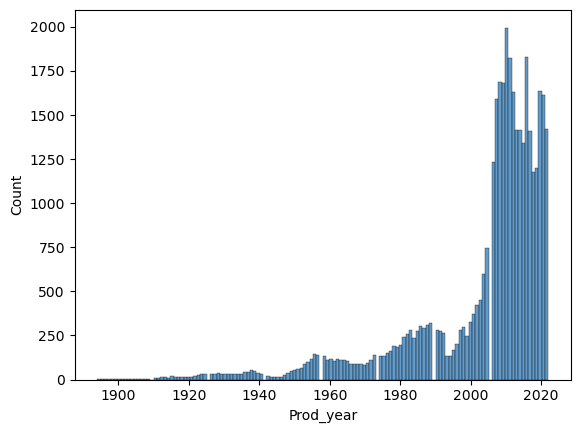

In [1514]:
sns.histplot(data = data, x = "Prod_year" )

# Brand

In [1515]:
data.isna().sum()

Brand                      0
Model                     28
Category                   0
Displacement (ccm)      1029
Power (hp)             12381
Engine cylinder           16
Engine stroke             11
Gearbox                 5810
Fuel capacity (lts)     6796
Fuel system            10650
Fuel control           16511
Cooling system          4221
Transmission type       5631
Dry weight (kg)        16009
Wheelbase (mm)         13013
Seat height (mm)       14318
Prod_year                  0
dtype: int64

In [1516]:
data['Brand'].unique()
# i checked names from the internet they are clean

array(['acabion', 'access', 'ace', 'adiva', 'adler', 'adly', 'aeon',
       'aermacchi', 'agrati', 'ajp', 'ajs', 'alfer', 'alligator',
       'allstate', 'alphasports', 'alta', 'amazonas', 'american eagle',
       'american ironhorse', 'apc', 'aprilia', 'apsonic', 'arch',
       'arctic cat', 'ardie', 'ariel', 'arlen ness', 'arqin', 'askoll',
       'aspes', 'ather', 'atk', 'atlas honda', 'aurora',
       'avanturaa choppers', 'avinton', 'avon', 'azel', 'bajaj', 'balkan',
       'baltmotors', 'bamx', 'baotian', 'barossa', 'batavus', 'beeline',
       'benelli', 'bennche', 'beta', 'better', 'big bear choppers',
       'big dog', 'bimota', 'bintelli', 'black douglas', 'blackburne',
       'blata', 'bluroc', 'bmc choppers', 'bmw', 'boom trikes', 'borile',
       'boss hoss', 'bourget', 'bpg', 'brammo', 'bridgestone', 'britten',
       'brixton', 'brockhouse', 'brough superior', 'brudeli', 'bsa',
       'buccimoto', 'buell', 'bullit', 'bultaco', 'cagiva',
       'california scooter', 'can-

In [1517]:
# check
data['Brand'] = data['Brand'].str.lower().str.strip()

In [1518]:
data['Brand'].unique()

array(['acabion', 'access', 'ace', 'adiva', 'adler', 'adly', 'aeon',
       'aermacchi', 'agrati', 'ajp', 'ajs', 'alfer', 'alligator',
       'allstate', 'alphasports', 'alta', 'amazonas', 'american eagle',
       'american ironhorse', 'apc', 'aprilia', 'apsonic', 'arch',
       'arctic cat', 'ardie', 'ariel', 'arlen ness', 'arqin', 'askoll',
       'aspes', 'ather', 'atk', 'atlas honda', 'aurora',
       'avanturaa choppers', 'avinton', 'avon', 'azel', 'bajaj', 'balkan',
       'baltmotors', 'bamx', 'baotian', 'barossa', 'batavus', 'beeline',
       'benelli', 'bennche', 'beta', 'better', 'big bear choppers',
       'big dog', 'bimota', 'bintelli', 'black douglas', 'blackburne',
       'blata', 'bluroc', 'bmc choppers', 'bmw', 'boom trikes', 'borile',
       'boss hoss', 'bourget', 'bpg', 'brammo', 'bridgestone', 'britten',
       'brixton', 'brockhouse', 'brough superior', 'brudeli', 'bsa',
       'buccimoto', 'buell', 'bullit', 'bultaco', 'cagiva',
       'california scooter', 'can-

# Model

In [1519]:
data.isna().sum()

Brand                      0
Model                     28
Category                   0
Displacement (ccm)      1029
Power (hp)             12381
Engine cylinder           16
Engine stroke             11
Gearbox                 5810
Fuel capacity (lts)     6796
Fuel system            10650
Fuel control           16511
Cooling system          4221
Transmission type       5631
Dry weight (kg)        16009
Wheelbase (mm)         13013
Seat height (mm)       14318
Prod_year                  0
dtype: int64

In [1520]:
data['Model'].unique()

array(['da vinci 650-vi', 'gtbo 55', 'gtbo 600 daytona-vi', ..., 'z 22',
       'z 249', 'z 300'], dtype=object)

In [1521]:
data['Model'].sample(n=50)

25912                        speedfight 2
20477                    450 exc six days
35504                        mt-09 tracer
30554                               t 500
4483                            bhc-3 ls2
27272                                tora
12620                        cbr 300r abs
22273                        fun 125 plus
1697                  4g square four 1000
25835                 ludix one dual seat
16995                             cyclone
18988                z 440 ltd belt drive
23449                        mgx-21  1400
19571                           matrix 50
36173                                tmax
30157                       ls 650 savage
33820                   granturismo 200 l
34268                 hrd series b rapide
28072         epa luxurious dirt bike 250
8772                           ec 515 fsr
1832                    vh 500 red hunter
10954               sportster forty-eight
4991                             mito 125
25944                         tkr 

In [1522]:
data.duplicated().value_counts()

False    38472
True        71
dtype: int64

In [1523]:
data.drop_duplicates(inplace=True)

In [1524]:
data.duplicated().value_counts()

False    38472
dtype: int64

In [1525]:
data.isna().sum()

Brand                      0
Model                     28
Category                   0
Displacement (ccm)      1011
Power (hp)             12362
Engine cylinder           16
Engine stroke             11
Gearbox                 5797
Fuel capacity (lts)     6768
Fuel system            10628
Fuel control           16463
Cooling system          4214
Transmission type       5611
Dry weight (kg)        15989
Wheelbase (mm)         12980
Seat height (mm)       14290
Prod_year                  0
dtype: int64

In [1526]:
# there are 28 missing values
f = data['Model'].isna()
data.loc[f]

,Brand,Model,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Prod_year
5831,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1922
5832,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1923
5833,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1924
5834,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1925
5835,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1926
5836,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1927
5837,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1928
5838,coventry eagle,NaN,Allround,998.0,85.5,Twin,four-stroke,NaN,NaN,Carburettor,NaN,Air,Chain,175.0,NaN,NaN,1929
6063,cz,NaN,Unspecified category,180.0,13.0,Single cylinder,two-stroke,4-speed,12.50,NaN,NaN,NaN,NaN,128.0,NaN,780.0,1994
6697,derringer,NaN,Classic,49.0,NaN,Single cylinder,four-stroke,Automatic,6.81,Carburettor,NaN,NaN,Chain,NaN,NaN,NaN,2010


In [1527]:
# i checked information from the internet
# Fill NaN values in the 'model' column with 'qv3' where 'Brand' is 'qooder'
data['Model'] = data.apply(lambda x: 'qv3' if x['Brand'] == 'qooder' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1528]:
# Fill NaN values in the 'model' column with '495cc' where 'Brand' is 'marsh'
data['Model'] = data.apply(lambda x: '495cc' if x['Brand'] == 'marsh' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1529]:
# Fill NaN values in the 'model' column with '532cc' where 'Brand' is 'emblem'
data['Model'] = data.apply(lambda x: '532cc' if x['Brand'] == 'emblem' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1530]:
# Fill NaN values in the 'model' column with '350cc' where 'Brand' is 'coventry eagle'
data['Model'] = data.apply(lambda x: '350cc' if x['Brand'] == 'coventry eagle' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1531]:
# Fill NaN values in the 'model' column with 'Dnepr MT-10' where 'Brand' is 'dnepr'
data['Model'] = data.apply(lambda x: 'Dnepr MT-10' if x['Brand'] == 'dnepr' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1532]:
# Fill NaN values in the 'model' column with 'CZ 125, CZ 250, and CZ 400' where 'Brand' is 'cz' , year 1994
data['Model'] = data.apply(lambda x: 'CZ 125, CZ 250, and CZ 400' if x['Brand'] == 'cz' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1533]:
# Fill NaN values in the 'model' column with 'derringer 33' where 'Brand' is 'derringer' , year 2010
data['Model'] = data.apply(lambda x: 'derringer 33.' if x['Brand'] == 'derringer' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1534]:
# Fill NaN values in the 'model' column with 'di Blasi R30 ' where 'Brand' is 'di blasii ' year 2003
data['Model'] = data.apply(lambda x: ' di Blasi R30 ' if x['Brand'] == 'di blasi' and pd.isna(x['Model']) else x['Model'], axis=1)

In [1535]:
f = data['Model'].isna()
data.loc[f]

,Brand,Model,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Prod_year


In [1536]:
data.isna().sum()
# missing values were filled

Brand                      0
Model                      0
Category                   0
Displacement (ccm)      1011
Power (hp)             12362
Engine cylinder           16
Engine stroke             11
Gearbox                 5797
Fuel capacity (lts)     6768
Fuel system            10628
Fuel control           16463
Cooling system          4214
Transmission type       5611
Dry weight (kg)        15989
Wheelbase (mm)         12980
Seat height (mm)       14290
Prod_year                  0
dtype: int64

# Category

In [1537]:
data['Category'].unique()

array(['Prototype / concept model', 'Sport', 'Scooter', 'ATV', 'Allround',
       'Naked bike', 'Custom / cruiser', 'Cross / motocross',
       'Super motard', 'Minibike, sport', 'Minibike, cross', 'Classic',
       'Touring', 'Enduro / offroad', 'Trial', 'Unspecified category',
       'Sport touring', 'Speedway'], dtype=object)

In [1538]:
data['Category'].isna().sum()
# i think it`s clean

0

In [1539]:
data.isna().sum()

Brand                      0
Model                      0
Category                   0
Displacement (ccm)      1011
Power (hp)             12362
Engine cylinder           16
Engine stroke             11
Gearbox                 5797
Fuel capacity (lts)     6768
Fuel system            10628
Fuel control           16463
Cooling system          4214
Transmission type       5611
Dry weight (kg)        15989
Wheelbase (mm)         12980
Seat height (mm)       14290
Prod_year                  0
dtype: int64

# Displacement (ccm)

In [1540]:
data['Displacement (ccm)'].unique()

array([  nan, 1300.,  280., ...,  312.,  791.,  751.])

In [1541]:
data['Displacement (ccm)'].sample(n=30)

32558    1597.0
26517      39.9
28973     124.0
2968     1916.0
34780     125.0
33559     349.0
14163      49.0
32696     888.0
24643     998.0
26384     124.0
3598     1293.0
29775     124.0
16263     596.0
7545      821.0
29053     149.0
26863     125.0
18437    1043.0
28603    1462.0
25706     152.0
4522     6200.0
8549      124.7
3838     1170.0
18880     773.0
3703      492.0
10969     883.3
3056     1198.0
15084     591.0
9242       49.6
35173     599.0
7284      864.0
Name: Displacement (ccm), dtype: float64

In [1542]:
data['Displacement (ccm)'].isna().sum()

1011

<AxesSubplot:xlabel='Displacement (ccm)'>

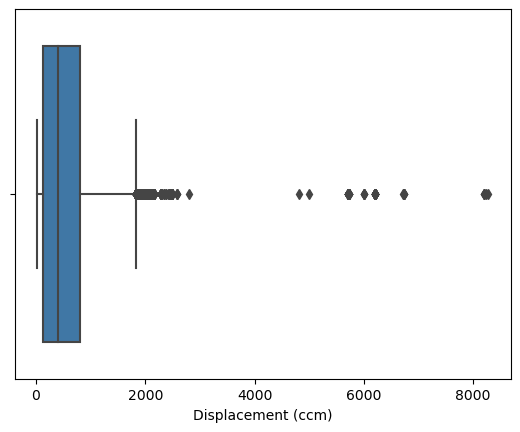

In [1543]:
sns.boxplot(data['Displacement (ccm)'])
# many outliers

In [1544]:
# to reduce outliers 
from scipy.stats.mstats import winsorize
# Winsorize the data at the 5th and 95th percentiles
winsorized_data = winsorize(data['Displacement (ccm)'], limits=[0.05, 0.05])

<AxesSubplot:>

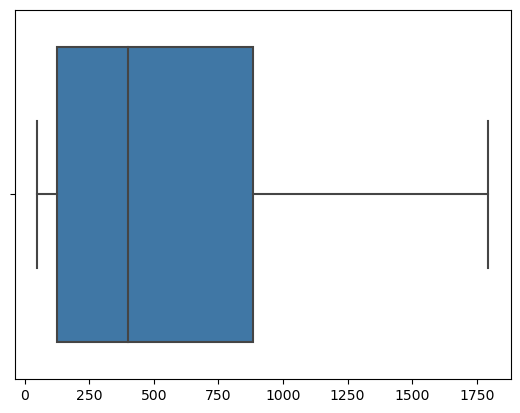

In [1545]:
sns.boxplot(winsorized_data)

In [1546]:
data['Displacment_cmm'] = pd.Series(winsorized_data)
data['Displacment_cmm']

0        1795.0
1        1300.0
2        1795.0
3        1795.0
4        1300.0
          ...  
38468     249.0
38469     298.0
38470     298.0
38471     781.0
38476       NaN
Name: Displacment_cmm, Length: 38472, dtype: float64

In [1547]:
data['Displacment_cmm'].describe()

count    38471.000000
mean       573.300320
std        508.945926
min         49.400000
25%        125.000000
50%        400.000000
75%        883.000000
max       1795.000000
Name: Displacment_cmm, dtype: float64

In [1548]:
data.drop('Displacement (ccm)',axis=1 ,inplace=True)

In [1549]:
data.head()

,Brand,Model,Category,Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Prod_year,Displacment_cmm
0,acabion,da vinci 650-vi,Prototype / concept model,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN,2011,1795.0
1,acabion,gtbo 55,Sport,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN,2007,1300.0
2,acabion,gtbo 600 daytona-vi,Prototype / concept model,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,2011,1795.0
3,acabion,gtbo 600 daytona-vi,Prototype / concept model,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,2021,1795.0
4,acabion,gtbo 70,Prototype / concept model,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN,2007,1300.0


In [1550]:
data['Displacment_cmm'].fillna(data['Displacment_cmm'].median(), inplace=True)

In [1551]:
data['Displacment_cmm'].isna().sum()

0

<AxesSubplot:xlabel='Displacment_cmm'>

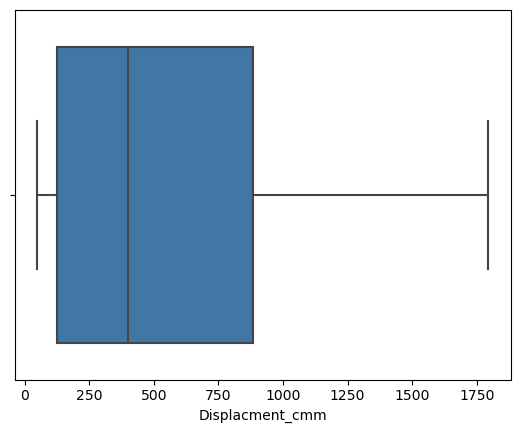

In [1552]:
sns.boxplot(data['Displacment_cmm'])

# Power (hp)

In [1554]:
data['Power (hp)'].unique()

array([8.04e+02, 5.41e+02, 5.36e+02, 6.89e+02, 1.10e+00, 1.88e+01,
       2.95e+01, 3.76e+01, 4.56e+01, 5.63e+01, 5.77e+01, 6.80e+00,
       1.31e+01, 2.68e+01,      nan, 1.48e+01, 1.30e+01, 1.58e+01,
       2.15e+01, 2.06e+01, 2.94e+01, 3.67e+01, 9.40e+00, 1.30e+00,
       8.00e-01, 1.03e+01, 1.80e+01, 1.10e+01, 1.60e+01, 8.60e+00,
       8.40e+00, 5.00e+00, 3.70e+00, 7.50e+00, 7.10e+00, 7.80e+00,
       2.50e+01, 2.70e+01, 3.00e+01, 8.70e+00, 6.40e+00, 1.21e+01,
       1.94e+01, 1.61e+01, 2.01e+01, 3.60e+00, 3.00e+00, 1.81e+01,
       1.05e+01, 2.21e+01, 2.28e+01, 2.66e+01, 3.22e+01, 1.40e+01,
       3.20e+00, 1.07e+01, 6.60e+00, 1.41e+01, 3.40e+00, 2.48e+01,
       1.85e+01, 1.37e+01, 6.00e+00, 3.80e+00, 4.30e+00, 4.70e+00,
       7.40e+00, 9.50e+00, 1.25e+01, 1.26e+01, 2.00e+01, 1.24e+01,
       1.27e+01, 1.77e+01, 2.75e+01, 4.80e+01, 3.80e+01, 1.01e+01,
       9.80e+00, 9.90e+00, 3.50e+00, 1.14e+01, 2.00e+00, 2.30e+01,
       6.20e+00, 2.50e+00, 1.13e+01, 1.70e+01, 2.80e+01, 3.30e

In [1555]:
data['Power (hp)'].describe()

count    26110.000000
mean        50.777809
std         52.081496
min          0.300000
25%         12.000000
50%         30.000000
75%         77.000000
max        804.000000
Name: Power (hp), dtype: float64

<AxesSubplot:xlabel='Power (hp)'>

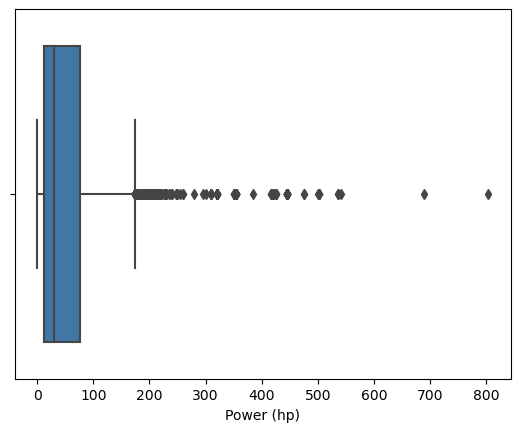

In [1556]:
sns.boxplot(data['Power (hp)'])

<AxesSubplot:xlabel='Power_hp'>

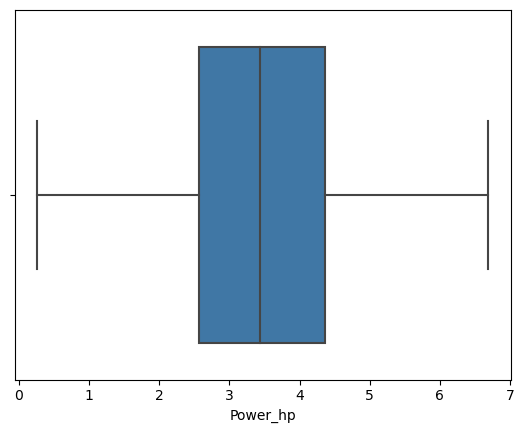

In [1557]:
# for outliers , i will use logarithmic transformation
data['Power_hp'] = data['Power (hp)'].apply(lambda x: np.log1p(x))
sns.boxplot(data['Power_hp'])

In [1558]:
data['Power_hp'].describe()

count    26110.000000
mean         3.433418
std          1.088061
min          0.262364
25%          2.564949
50%          3.433987
75%          4.356709
max          6.690842
Name: Power_hp, dtype: float64

In [1559]:
data['Power_hp'].isna().sum()

12362

In [1560]:
data['Power_hp'].fillna(data['Power_hp'].median(), inplace=True)

In [1561]:
data['Power_hp'].isna().sum()

0

In [1562]:
data.drop('Power (hp)',axis=1 ,inplace=True)

# Engine cylinder

In [1564]:
data['Engine cylinder'].unique()

array(['Electric', 'In-line four', 'Single cylinder', nan, 'Twin', 'V2',
       'Four cylinder boxer', 'V4', 'Diesel', 'Square four cylinder',
       'In-line three', 'V8', 'In-line six', 'Six cylinder boxer',
       'Two cylinder boxer', 'V10', 'V6', 'Single disk Wankel', 'V3',
       'Radial', 'Gas turbine', 'Dual disk Wankel'], dtype=object)

In [1565]:
data['Engine cylinder'].isna().sum()

16

In [1566]:
data['Engine cylinder'].mode()[0]
data['Engine cylinder'].fillna(data['Engine cylinder'].mode()[0], inplace=True)

In [1567]:
data['Engine cylinder'].isna().sum()

0

In [1568]:
data.head()

,Brand,Model,Category,Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Prod_year,Displacment_cmm,Power_hp
0,acabion,da vinci 650-vi,Prototype / concept model,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN,2011,1795.0,6.690842
1,acabion,gtbo 55,Sport,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN,2007,1300.0,6.295266
2,acabion,gtbo 600 daytona-vi,Prototype / concept model,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,2011,1795.0,6.285998
3,acabion,gtbo 600 daytona-vi,Prototype / concept model,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN,2021,1795.0,6.285998
4,acabion,gtbo 70,Prototype / concept model,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN,2007,1300.0,6.536692


# Engine stroke

In [1569]:
data['Engine stroke'].unique()

array(['Electric', ' four-stroke', ' two-stroke', nan, 'Diesel',
       'Square four cylinder', 'Single disk Wankel', 'Radial',
       'Gas turbine', 'Dual disk Wankel'], dtype=object)

In [1570]:
data['Engine stroke'].isna().sum()

11

In [1571]:
data['Engine stroke'].mode()[0]
data['Engine stroke'].fillna(data['Engine stroke'].mode()[0], inplace=True)

In [1572]:
data['Engine stroke'].isna().sum()

0

# Gearbox

In [1574]:
data['Gearbox'].unique()

array([nan, '6-speed', 'Automatic', '5-speed', '1-speed', '3-speed',
       '4-speed', '7-speed', '8-speed', '2-speed', '4-speed with reverse',
       '10-speed', '2-speed automatic', '5-speed with reverse',
       '6-speed with reverse', '3-speed automatic', '100-speed'],
      dtype=object)

In [1575]:
data['Gearbox'].mode()[0]
data['Gearbox'].fillna(data['Gearbox'].mode()[0], inplace=True)

In [1576]:
data['Gearbox'].isna().sum()

0

# Fuel capacity (lts)

In [1577]:
data['Fuel capacity (lts)'].unique()

array([  nan, 14.  , 21.  , 16.6 , 13.5 , 12.  , 13.  , 11.  , 12.2 ,
        5.  ,  6.  ,  7.  , 15.  ,  3.75,  6.2 ,  3.5 , 17.29,  4.75,
        5.8 ,  5.5 ,  8.  ,  7.3 ,  8.5 ,  9.3 , 23.  ,  3.4 ,  9.  ,
       24.  ,  2.  , 17.  , 18.  ,  6.5 ,  7.5 ,  9.5 , 10.  ,  4.7 ,
       11.2 ,  6.3 , 19.  ,  7.2 , 12.5 , 16.  ,  4.5 ,  6.7 ,  4.6 ,
       18.5 , 28.  ,  7.57, 12.49, 17.03, 46.  , 40.  , 13.24, 18.92,
       15.89, 22.  , 20.  , 10.5 , 25.  , 30.  ,  9.6 ,  2.8 ,  7.7 ,
        9.08,  7.4 , 11.5 , 19.5 , 14.5 , 16.5 ,  7.8 ,  8.4 , 13.2 ,
        8.97,  7.6 , 15.5 , 18.8 ,  2.5 , 17.9 , 18.93, 20.1 , 21.57,
        8.71, 12.86, 16.3 , 16.28, 21.5 , 21.6 , 24.6 ,  5.68,  5.7 ,
       12.11, 22.71, 22.7 ,  5.3 , 20.06, 21.95, 20.81, 20.8 , 13.25,
       13.6 , 11.36, 15.14, 15.9 , 14.8 , 11.9 ,  6.4 , 10.6 ,  4.9 ,
        9.84, 17.41,  9.46,  8.7 , 12.3 , 13.1 , 15.52,  8.6 ,  9.2 ,
        9.25,  9.7 ,  5.6 ,  4.  ,  8.8 ,  3.  ,  4.8 ,  6.8 , 27.  ,
       12.7 , 15.97,

<AxesSubplot:xlabel='Fuel capacity (lts)'>

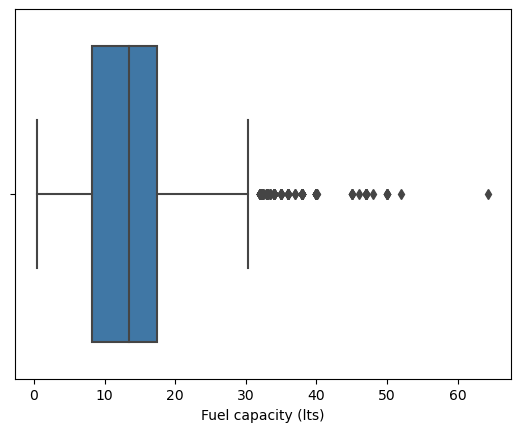

In [1578]:
sns.boxplot(data['Fuel capacity (lts)'])

In [1579]:
# many outliers so i will fill nan with median 
data['Fuel capacity (lts)'].fillna(data['Fuel capacity (lts)'].median(), inplace=True)

In [1580]:
# for outliers
from scipy.stats.mstats import winsorize
# Winsorize the data at the 5th and 95th percentiles
winsorized_data = winsorize(data['Fuel capacity (lts)'], limits=[0.05, 0.05])

<AxesSubplot:>

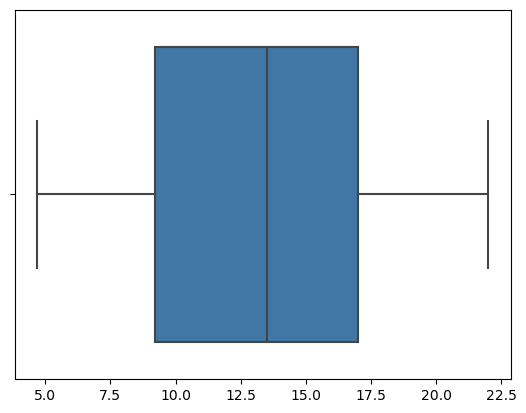

In [1581]:
sns.boxplot(winsorized_data)

In [1582]:
data['Fuel_capacity_lts'] = pd.Series(winsorized_data)

In [1583]:
data.drop('Fuel capacity (lts)',axis=1 ,inplace=True)

In [1584]:
data['Fuel_capacity_lts'].isna().sum()

1

In [1585]:
data['Fuel_capacity_lts'].fillna(data['Fuel_capacity_lts'].median(), inplace=True)

# Fuel system

In [1586]:
data['Fuel system'].unique()

array([nan, 'Turbo. KKK Acabion Extended', 'Carburettor', ...,
       'Carburettor. Bing 20mm', 'Carburettor. Amal 22mm',
       'Carburettor. Bing 19mm (1/19/36)'], dtype=object)

In [1587]:
data['Fuel system'].sample(n=50)

29967                                            Injection
33594                                          Carburettor
5329                                 Injection. Mikuni D45
28123                                          Carburettor
10869    Injection. Electronic Sequential Port Fuel Inj...
3912     Injection. Digital engine management with elec...
25429                                    Carburettor. Amac
38383                               Carburettor. Bing 22mm
7136                                                   NaN
15648                                                  NaN
9909                                           Carburettor
18434    Injection. DFI® with 38mm Keihin throttle bodi...
22597                                                  NaN
15523                                            Injection
13688        Injection. Programmed Fuel Injection (PGM-FI)
37486                                          Carburettor
7889                                           Carburett

In [1588]:
data['Fuel system'].mode()[0]
data['Fuel system'].fillna(data['Fuel system'].mode()[0], inplace=True)

In [1589]:
data['Fuel system'].isna().sum()

0

# Fuel control

In [1590]:
data['Fuel control'].unique()

array([nan, 'Overhead Valves (OHV)', 'Overhead Cams (OHC)',
       'Single Overhead Cams (SOHC)',
       'Double Overhead Cams/Twin Cam (DOHC)', 'Port control',
       'Rotary valves', 'Membrane & variable discharge openings',
       'Membrane', 'Desmodromic valve control', 'Sidevalves',
       'Standing valves', 'Pushrods', 'Membrane & power valve',
       'Rotary valves & variable discharge openings'], dtype=object)

In [1591]:
data['Fuel control'].mode()[0]
data['Fuel control'].fillna(data['Fuel control'].mode()[0], inplace=True)

In [1592]:
data['Fuel control'].isna().sum()

0

# Cooling system

In [1593]:
data['Cooling system'].unique()
# syntax problems

array(['Liquid', nan, 'Air', 'Liquids', 'the air', 'airr', 'air',
       'Oil & air', 'Oil and air'], dtype=object)

In [1594]:
data['Cooling system'] = data['Cooling system'].str.lower()

In [1595]:
data['Cooling system'] = data['Cooling system'].str.replace('the air','air')
data['Cooling system'] = data['Cooling system'].str.replace('airr','air')
data['Cooling system'] = data['Cooling system'].str.replace('oil & air','oil and air')
data['Cooling system'] = data['Cooling system'].str.replace('liquids','liquid')

In [1596]:
data['Cooling system'].unique()

array(['liquid', nan, 'air', 'oil and air'], dtype=object)

In [1597]:
# NAN values
data['Cooling system'].mode()[0]
data['Cooling system'].fillna(data['Cooling system'].mode()[0], inplace=True)

In [1598]:
data['Cooling system'].unique()

array(['liquid', 'air', 'oil and air'], dtype=object)

In [1599]:
data['Cooling system'].isna().sum()

0

# Transmission type

In [1600]:
data['Transmission type'].unique()

array(['Chain', nan, 'Belt', 'Shaft drive'], dtype=object)

In [1601]:
# NAN values
data['Transmission type'].mode()[0]
data['Transmission type'].fillna(data['Transmission type'].mode()[0], inplace=True)

In [1602]:
data['Transmission type'].isna().sum()

0

# Dry weight (kg)

In [1603]:
data['Dry weight (kg)'].sample(n=50)

9006      69.4
27622     68.5
2591     362.4
34969    264.0
8370       NaN
2306       NaN
13055      NaN
31908     65.0
34590    115.0
4548       NaN
30117      NaN
8831      55.0
32961      NaN
31536      NaN
18281    152.0
16187    244.0
653        NaN
15        95.0
827        NaN
36209      NaN
19886      NaN
9759     322.0
20062    127.0
25753      NaN
37775      NaN
35960    152.0
11345      NaN
6422       NaN
23843      NaN
16036    188.7
6374     115.0
33195      NaN
8337      95.0
14964      NaN
24184     95.0
14894      NaN
37896      NaN
18174      NaN
107       52.0
16819      NaN
15844    132.0
27712    100.0
5856       NaN
19011      NaN
19187      NaN
9470       NaN
2371     199.0
11892     50.0
36415     72.0
15360    106.7
Name: Dry weight (kg), dtype: float64

<AxesSubplot:xlabel='Dry weight (kg)'>

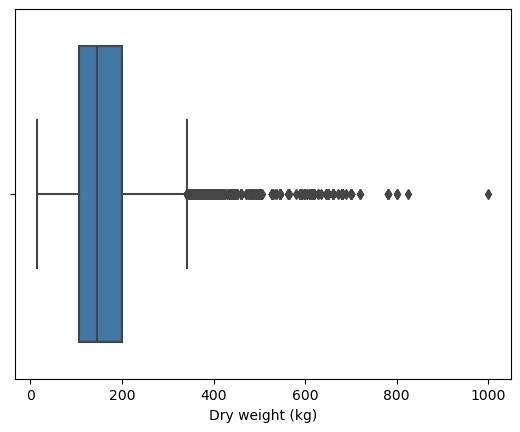

In [1604]:
sns.boxplot(data['Dry weight (kg)'])

In [1605]:
# for outliers
from scipy.stats.mstats import winsorize
# Winsorize the data at the 5th and 95th percentiles
winsorized_data = winsorize(data['Dry weight (kg)'], limits=[0.05, 0.05])

<AxesSubplot:>

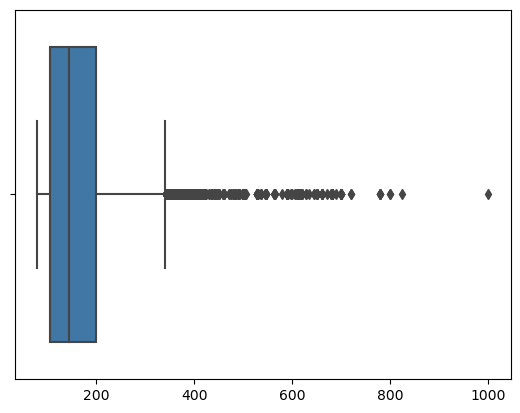

In [1606]:
sns.boxplot(winsorized_data)

In [1607]:
data['Dry_weight_kg'] = pd.Series(winsorized_data)

In [1608]:
data.drop('Dry weight (kg)',axis=1 ,inplace=True)

In [1609]:
data['Dry_weight_kg'].isna().sum()

15990

In [1610]:
# for nan values , fill median
data['Dry_weight_kg'].fillna(data['Dry_weight_kg'].median(), inplace=True)

In [1611]:
data['Dry_weight_kg'].isna().sum()

0

# Wheelbase (mm)

In [1612]:
data['Wheelbase (mm)'].unique()

array([  nan, 1759., 1640., 1560., 1751., 1400., 1300., 1320., 1524.,
       1257., 1047., 1210., 1240., 1230.,  890.,  910., 1220.,  800.,
       1250., 1255., 1046., 1100., 1565.,  850., 1050., 1155.,  745.,
       1290., 1360., 1545., 1260., 1065., 1115., 1294.,  970.,  820.,
       1000., 1270., 1321., 1340., 1410., 1380., 1389., 1460., 1465.,
       1532., 1540., 1450., 1080., 1382., 1670., 1330., 1650., 1500.,
       1570., 1275., 1850., 1860., 1285., 1345., 1422., 1397., 1510.,
       1333., 1549., 1499., 1305., 1470., 1370., 1434., 1480., 1515.,
       1488., 1492., 1461., 1487., 1455., 1745., 2159., 2141., 1887.,
       2134., 1803., 1981., 1702., 1553., 1550., 1544., 1568., 1280.,
       1462., 1528., 1505., 1415.,  770., 1463.,  925., 1024., 1349.,
       1475., 1479., 1353., 1350., 1311., 1310., 1369., 1420., 1435.,
       1418., 1405., 1439., 1424., 1412., 1425., 1406., 1395., 1365.,
       1495., 1245., 1256., 1391., 1530., 1535., 1605., 1440., 1175.,
       1358., 1359.,

<AxesSubplot:xlabel='Wheelbase (mm)'>

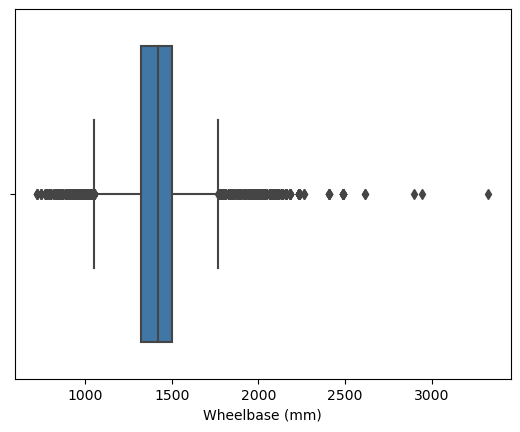

In [1613]:
sns.boxplot(data['Wheelbase (mm)'])

<AxesSubplot:>

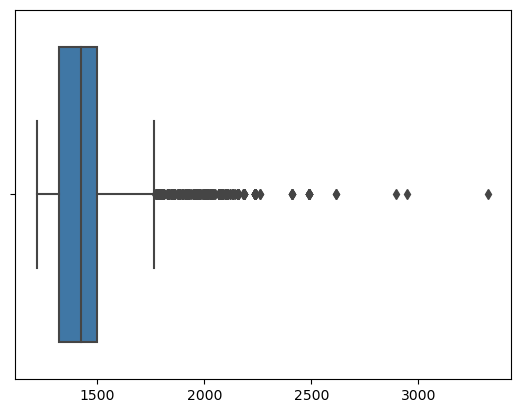

In [1614]:
# for outliers
from scipy.stats.mstats import winsorize
# Winsorize the data at the 5th and 95th percentiles
winsorized_data = winsorize(data['Wheelbase (mm)'], limits=[0.05, 0.05])
sns.boxplot(winsorized_data)

In [1615]:
# for nan values , fill median
data['Wheelbase (mm)'].fillna(data['Wheelbase (mm)'].median(), inplace=True)

In [1616]:
data['Wheelbase (mm)'].isna().sum()

0

# Seat height (mm)

In [1617]:
data['Seat height (mm)'].unique()

array([  nan,  750.,  610.,  740.,  700.,  770.,  720.,  800.,  775.,
        650.,  762.,  780.,  515.,  815.,  790.,  535.,  550.,  850.,
        920.,  774.,  735.,  820.,  710.,  600.,  870.,  840.,  810.,
        910.,  905.,  940.,  890.,  960.,  760.,  640.,  787.,  825.,
        789.,  686.,  690.,  865.,  950.,  635.,  970.,  927.,  953.,
        902.,  730.,  643.,  660.,  678.,  860.,  880.,  734.,  615.,
        754.,  830.,  846.,  845.,  817.,  835.,  805.,  785.,  851.,
        925.,  996.,  918.,  813.,  795.,  797.,  799.,  875.,   87.,
        706.,  267.,  745.,  965.,  914.,  945.,  831.,  709.,  784.,
        743.,  771.,  765.,  766.,  737.,  798.,  807.,  804.,  838.,
        864.,  828.,  711.,  818.,  859.,  559.,  622.,  863.,  680.,
        652.,  620.,  670.,  695.,  570.,  490.,  575.,  886.,  930.,
        933.,  935.,  928.,  885.,  894.,  980.,  508.,  483.,  584.,
        597.,  648.,  616.,  755.,  757.,  768.,  739.,  724.,  715.,
        911.,  701.,

<AxesSubplot:xlabel='Seat height (mm)'>

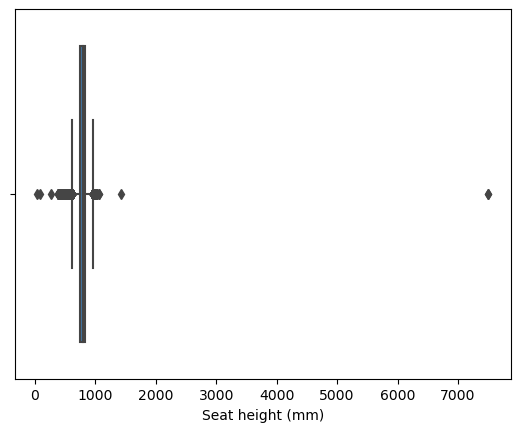

In [1618]:
sns.boxplot(data['Seat height (mm)'])

<AxesSubplot:>

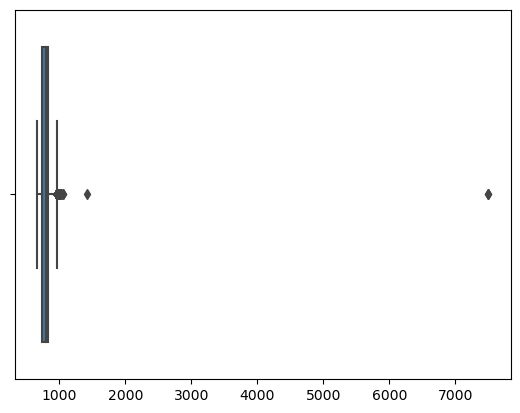

In [1619]:
#for outliers
from scipy.stats.mstats import winsorize
# Winsorize the data at the 5th and 95th percentiles
winsorized_data = winsorize(data['Seat height (mm)'], limits=[0.05, 0.05])
sns.boxplot(winsorized_data)

In [1620]:
# for nan values , fill median
data['Seat height (mm)'].fillna(data['Seat height (mm)'].median(), inplace=True)

# Check

In [1621]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38472 entries, 0 to 38476
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              38472 non-null  object 
 1   Model              38472 non-null  object 
 2   Category           38472 non-null  object 
 3   Engine cylinder    38472 non-null  object 
 4   Engine stroke      38472 non-null  object 
 5   Gearbox            38472 non-null  object 
 6   Fuel system        38472 non-null  object 
 7   Fuel control       38472 non-null  object 
 8   Cooling system     38472 non-null  object 
 9   Transmission type  38472 non-null  object 
 10  Wheelbase (mm)     38472 non-null  float64
 11  Seat height (mm)   38472 non-null  float64
 12  Prod_year          38472 non-null  int64  
 13  Displacment_cmm    38472 non-null  float64
 14  Power_hp           38472 non-null  float64
 15  Fuel_capacity_lts  38472 non-null  float64
 16  Dry_weight_kg      384

In [1622]:
data.isna().sum()

Brand                0
Model                0
Category             0
Engine cylinder      0
Engine stroke        0
Gearbox              0
Fuel system          0
Fuel control         0
Cooling system       0
Transmission type    0
Wheelbase (mm)       0
Seat height (mm)     0
Prod_year            0
Displacment_cmm      0
Power_hp             0
Fuel_capacity_lts    0
Dry_weight_kg        0
dtype: int64